In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC  # svm classifier
from sklearn.svm import LinearSVC  # for linearly separable data, faster than SVC(kernel='linear')
from sklearn.svm import SVR  # svm regressor
from sklearn.svm import LinearSVR  # also faster than SVR(kernel='linear')


In [16]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([('scaler', StandardScaler()),  # scale before svm is good practice
                    ('linear_svc', LinearSVC(C=1, loss='hinge'))])  # soft margin
svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

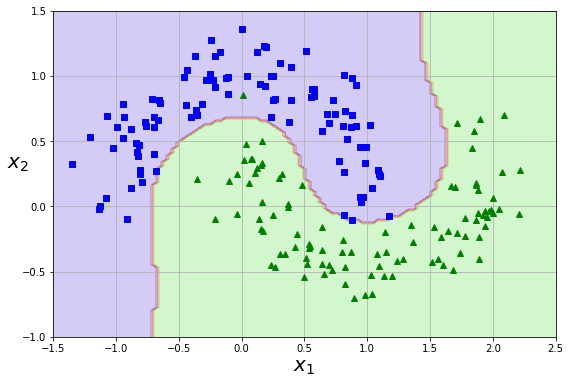

In [58]:
# adapt linear svc to higher dimensional (non-linear) features with polynomial transformation
X, y = datasets.make_moons(n_samples=200, noise=0.15, random_state=42)

poly_svm_clf = Pipeline([('poly_feat', PolynomialFeatures(degree=3)),  # or use SVC() with a kernel= 'poly'
                         ('scaler', StandardScaler()),
                         ('linear_svc', LinearSVC(C=10, loss='hinge', max_iter=10000, random_state=42))])
poly_svm_clf.fit(X, y)

# data
def plot_data(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.grid(True, which='both')
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
# decision boundary
def plot_predict(clf, axes):
    x1s = np.linspace(axes[0], axes[1], 100)  # coordinate vectors for rows
    x2s = np.linspace(axes[2], axes[3], 100)  # coordinate vectors for cols
    x1, x2 = np.meshgrid(x1s, x2s)  # return coordinate matrices from coordinate vectors
    X_new = np.c_[x1.ravel(), x2.ravel()]  # same format as input data X
    y_pred = clf.predict(X_new).reshape(x1.shape)  # out-of-plane dimension
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.2);  # [x1, x2, y] - 3D contour plot

# plot the adapted polynomial linear svc
plt.figure(figsize=(9, 6))
axes = [-1.5, 2.5, -1, 1.5]
plot_data(X, y, axes)
plot_predict(poly_svm_clf, axes);

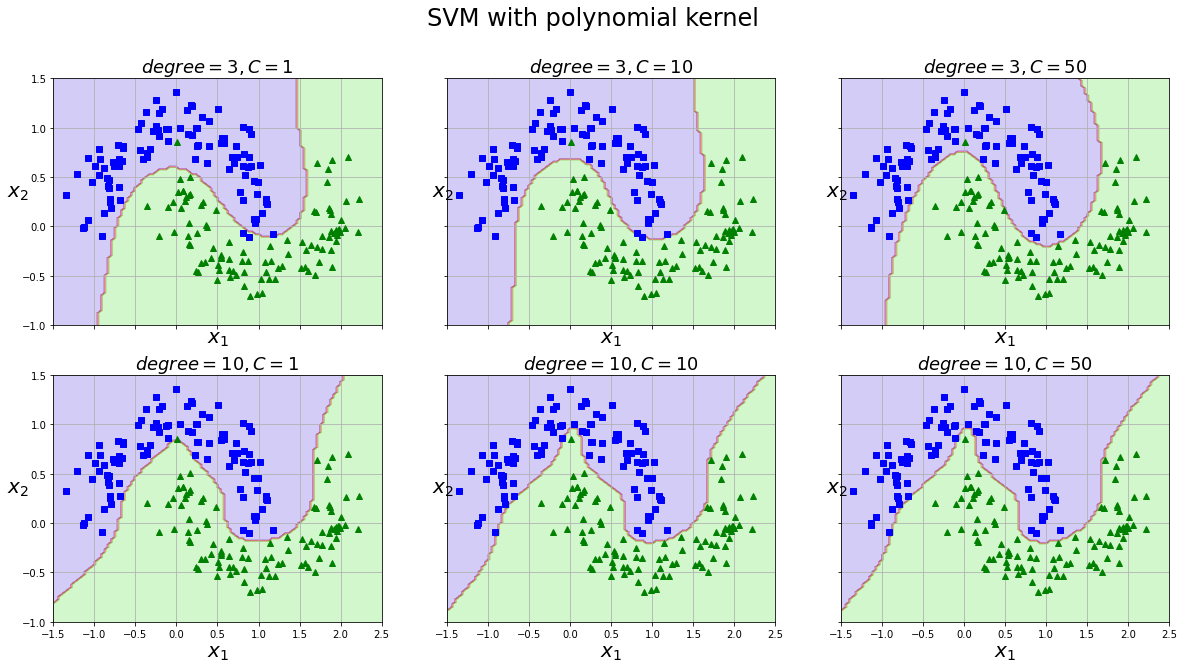

In [80]:
# degree of polynomial with C values (lower C, more regularisation) with kernel='poly'
poly3_C1_svm_clf = Pipeline([("scaler", StandardScaler()),
                             ("svm_clf", SVC(kernel="poly", coef0=1, degree=3, C=1))])
poly3_C1_svm_clf.fit(X, y)
poly10_C1_svm_clf = Pipeline([("scaler", StandardScaler()),
                              ("svm_clf", SVC(kernel="poly", coef0=1, degree=10, C=1))])
poly10_C1_svm_clf.fit(X, y)
poly3_C10_svm_clf = Pipeline([("scaler", StandardScaler()),
                             ("svm_clf", SVC(kernel="poly", coef0=1, degree=3, C=10))])
poly3_C10_svm_clf.fit(X, y)
poly10_C10_svm_clf = Pipeline([("scaler", StandardScaler()),
                              ("svm_clf", SVC(kernel="poly", coef0=1, degree=10, C=10))])
poly10_C10_svm_clf.fit(X, y)
poly3_C50_svm_clf = Pipeline([("scaler", StandardScaler()),
                             ("svm_clf", SVC(kernel="poly", coef0=1, degree=3, C=50))])
poly3_C50_svm_clf.fit(X, y)
poly10_C50_svm_clf = Pipeline([("scaler", StandardScaler()),
                              ("svm_clf", SVC(kernel="poly", coef0=1, degree=10, C=50))])
poly10_C50_svm_clf.fit(X, y)

# subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharex=True, sharey=True)

plt.sca(ax[0, 0])  # set current axes
plot_data(X, y, axes)
plot_predict(poly3_C1_svm_clf, axes)
plt.title(r"$degree=3, C=1$", fontsize=18)
plt.sca(ax[0, 1])  
plot_data(X, y, axes)
plot_predict(poly3_C10_svm_clf, axes)
plt.title(r"$degree=3, C=10$", fontsize=18)
plt.sca(ax[0, 2])  
plot_data(X, y, axes)
plot_predict(poly3_C50_svm_clf, axes)
plt.title(r"$degree=3, C=50$", fontsize=18)
plt.sca(ax[1, 0])  
plot_data(X, y, axes)
plot_predict(poly10_C1_svm_clf, axes)
plt.title(r"$degree=10, C=1$", fontsize=18)
plt.sca(ax[1, 1])  
plot_data(X, y, axes)
plot_predict(poly10_C10_svm_clf, axes)
plt.title(r"$degree=10, C=10$", fontsize=18)
plt.sca(ax[1, 2])  
plot_data(X, y, axes)
plot_predict(poly10_C50_svm_clf, axes)
plt.title(r"$degree=10, C=50$", fontsize=18)

plt.suptitle('SVM with polynomial kernel', fontsize=24);

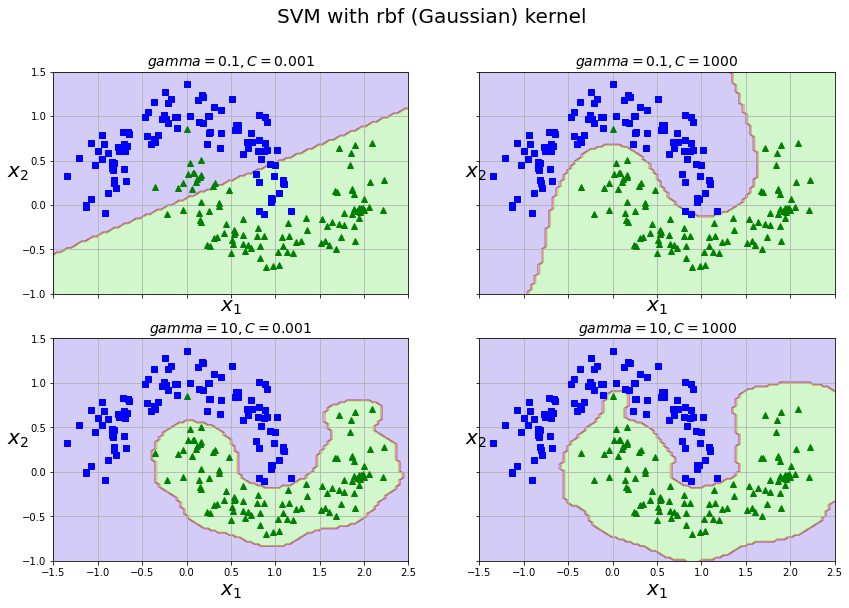

In [82]:
# gamma (the lower the more regularisation) with C values (also lower the more) with kernel='rbf'
rbf_svm_clf_1 = Pipeline([("scaler", StandardScaler()),
                          ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))])
rbf_svm_clf_1.fit(X, y)
rbf_svm_clf_2 = Pipeline([("scaler", StandardScaler()),
                          ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))])
rbf_svm_clf_2.fit(X, y)
rbf_svm_clf_3 = Pipeline([("scaler", StandardScaler()),
                          ("svm_clf", SVC(kernel="rbf", gamma=10, C=0.001))])
rbf_svm_clf_3.fit(X, y)
rbf_svm_clf_4 = Pipeline([("scaler", StandardScaler()),
                          ("svm_clf", SVC(kernel="rbf", gamma=10, C=1000))])
rbf_svm_clf_4.fit(X, y)

# subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 9), sharex=True, sharey=True)

plt.sca(ax[0, 0])  # set current axes
plot_data(X, y, axes)
plot_predict(rbf_svm_clf_1, axes)
plt.title(r"$gamma=0.1, C=0.001$", fontsize=14)
plt.sca(ax[0, 1])  
plot_data(X, y, axes)
plot_predict(rbf_svm_clf_2, axes)
plt.title(r"$gamma=0.1, C=1000$", fontsize=14)
plt.sca(ax[1, 0])  
plot_data(X, y, axes)
plot_predict(rbf_svm_clf_3, axes)
plt.title(r"$gamma=10, C=0.001$", fontsize=14)
plt.sca(ax[1, 1])  
plot_data(X, y, axes)
plot_predict(rbf_svm_clf_4, axes)
plt.title(r"$gamma=10, C=1000$", fontsize=14)

plt.suptitle('SVM with rbf (Gaussian) kernel', fontsize=20);